# __Plots and Calculations for Muon Lifetime__ 

## Plots from real Data

In [155]:
import ROOT as root
import numpy as np
import scipy as scipy
import math as m

In [156]:
data = np.loadtxt('/home/apmnair18/Github/Calculation_of_muon_life_in_Geant4/Data_and_Plots/Real_Data/700V_198.4.data')
ilist = data[:,0].tolist()
ilist = [value for value in ilist if value < 40000]

In [157]:
hist = root.TH1F("hist", r' V_{operating}=700V, V_{th}=198.4mV',60, 0, 21000)
canvas = root.TCanvas("canvas", "Histogram Canvas")
for value in ilist:
    hist.Fill(value)


exp_fit = root.TF1("exp_fit", "[0]*exp(x*[1]) + [2]")
hist.Fit(exp_fit)
A=exp_fit.GetParameter(0)
B=exp_fit.GetParameter(1)
C=exp_fit.GetParameter(2)
# tau = exp_fit.GetParameter(1)
# print("tau =", -1/tau)
    

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      73.3747
NDf                       =           51
Edm                       =   1.2138e-07
NCalls                    =          372
p0                        =      342.094   +/-   12.3122     
p1                        = -0.000525045   +/-   1.59475e-05 
p2                        =      1.92548   +/-   0.300738    


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


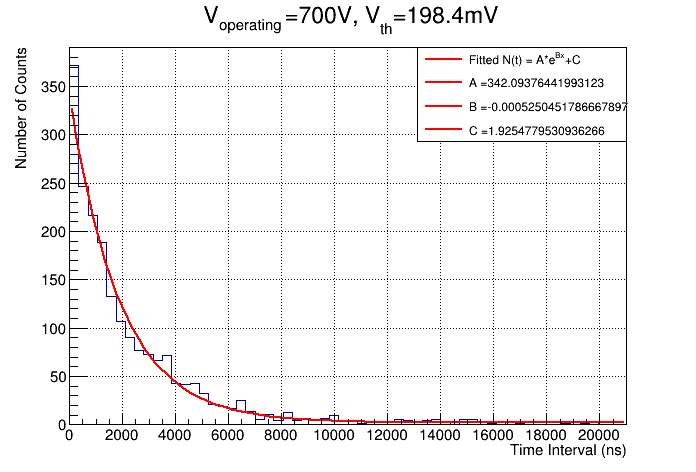

In [158]:
hist.SetStats(False)
hist.Draw()


legend = root.TLegend(0.6, 0.7, 0.9, 0.9)
legend.AddEntry(exp_fit, r"Fitted N(t) = A*e^{Bx}+C", "l")
legend.AddEntry(exp_fit, f"A ={A}", "l")
legend.AddEntry(exp_fit, f"B ={B}", "l")
legend.AddEntry(exp_fit, f"C ={C}", "l")

legend.Draw()

hist.GetXaxis().SetTitle("Time Interval (ns)")
hist.GetYaxis().SetTitle("Number of Counts")
canvas.SetGrid()
canvas.Draw()